In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from prophet import Prophet

In [2]:
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings("ignore")

# Enable Plotly in the notebook
init_notebook_mode(connected=True)

# Plotting style
plt.style.use("seaborn-whitegrid")

In [3]:
#read VOO prices
df = pd.read_csv("/Users/yeoyusiang/Downloads/HistoricalPrices.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,07/12/24,512.49,518.030,512.170,514.55,5238170.0
1,07/11/24,516.00,516.790,510.825,511.39,5546308.0
2,07/10/24,511.98,516.185,511.690,515.81,3446923.0
3,07/09/24,511.21,512.010,510.540,510.89,3145823.0
4,07/08/24,510.50,511.205,509.320,510.33,3143379.0


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,3483.000000,3483.000000,3483.00000,3483.000000,3.483000e+03
mean,248.091069,249.364612,246.69464,248.132109,2.664107e+06
std,104.325279,104.914602,103.71011,104.360111,2.400869e+06
min,99.140000,101.860000,98.24000,100.340000,8.638000e+03
25%,168.765000,169.420000,168.02500,168.920000,1.008047e+06
50%,225.000000,226.100000,223.89000,225.400000,2.193035e+06
75%,341.540000,342.480000,338.48000,340.735000,3.625124e+06
max,516.000000,518.030000,512.17000,515.810000,2.466926e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 0 to 3482
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3483 non-null   object 
 1    Open    3483 non-null   float64
 2    High    3483 non-null   float64
 3    Low     3483 non-null   float64
 4    Close   3483 non-null   float64
 5    Volume  3483 non-null   float64
dtypes: float64(5), object(1)
memory usage: 163.4+ KB


In [6]:
#strip whitespaces from column names
df.columns = df.columns.str.strip()
print(df.columns)

#reverse order of DataFrame to get date in ascending order
df = df.iloc[::-1]

# Ensure the 'Date' column is parsed as datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Verify the date range
print(df['Date'].min(), df['Date'].max())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
2010-09-09 00:00:00 2024-07-12 00:00:00


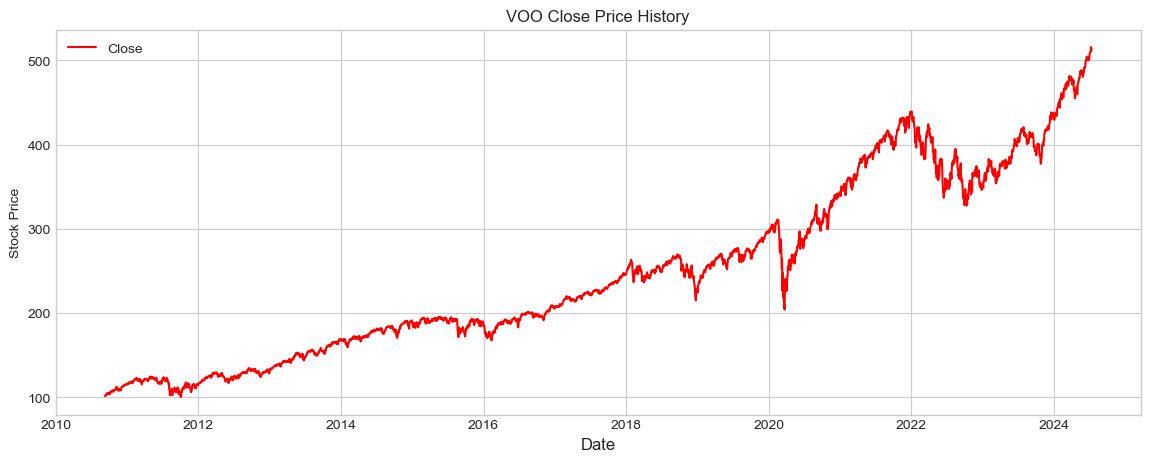

In [7]:
# Plot Close Price History
plt.figure(figsize=(14, 5))
plt.plot(df["Date"], df["Close"], label="Close", color="red")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price")
plt.title("VOO Close Price History")
plt.legend()

# Show plot
plt.show()

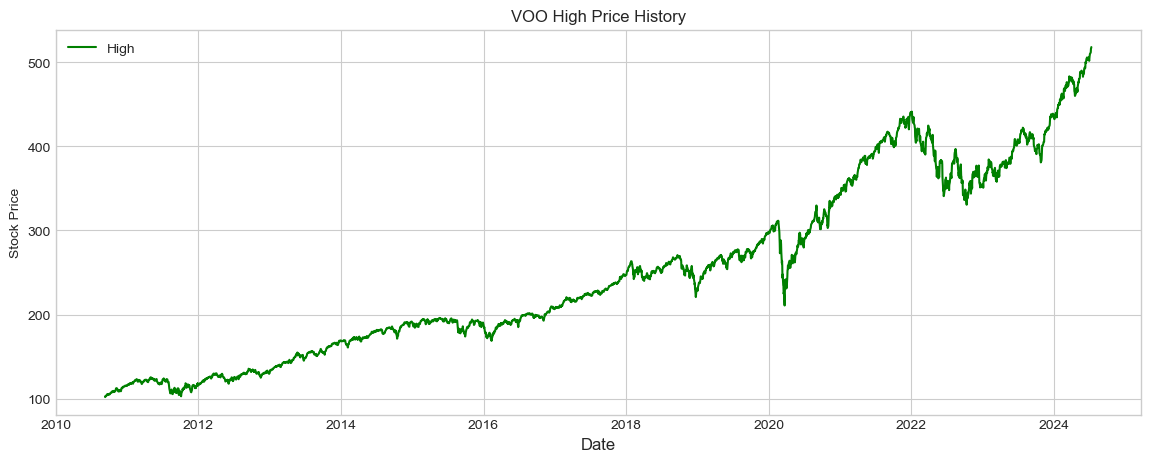

In [8]:
# Plot High Price History
plt.figure(figsize=(14, 5))
plt.plot(df["Date"], df["High"], label="High", color="green")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price")
plt.title("VOO High Price History")
plt.legend()

# Show plot
plt.show()

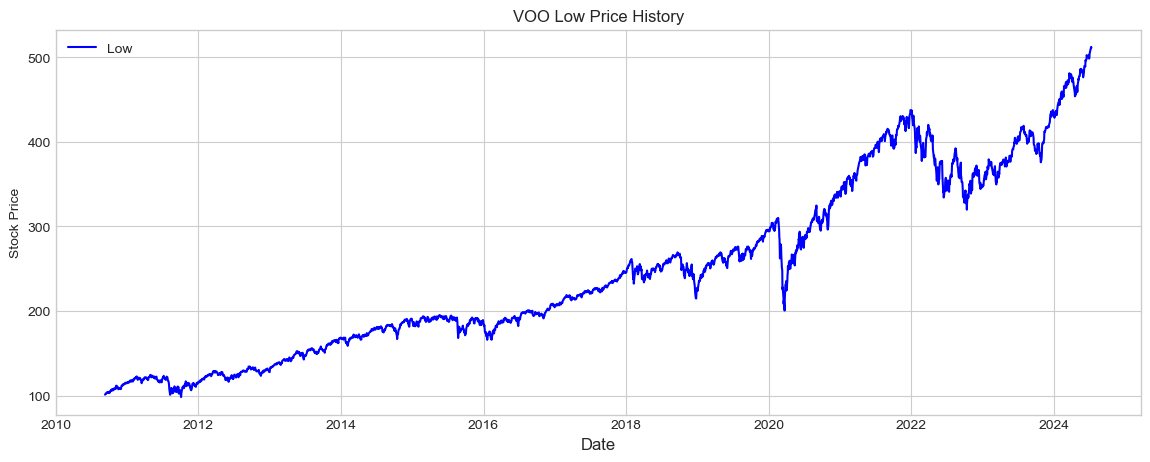

In [9]:
# Plot Low Price History
plt.figure(figsize=(14, 5))
plt.plot(df["Date"], df["Low"], label="Low", color="blue")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price")
plt.title("VOO Low Price History")
plt.legend()

# Show plot
plt.show()

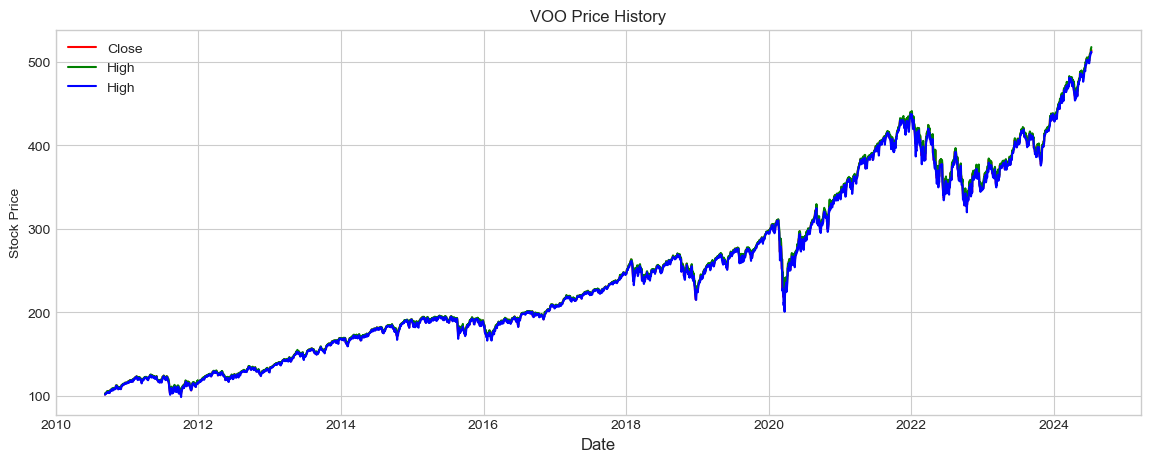

In [10]:
#Single Price History Plot

plt.figure(figsize=(14, 5))
plt.plot(df["Date"], df["Close"], label="Close", color="red")
plt.plot(df["Date"], df["High"], label="High", color="green")
plt.plot(df["Date"], df["Low"], label="High", color="blue")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price")
plt.title("VOO Price History")
plt.legend()


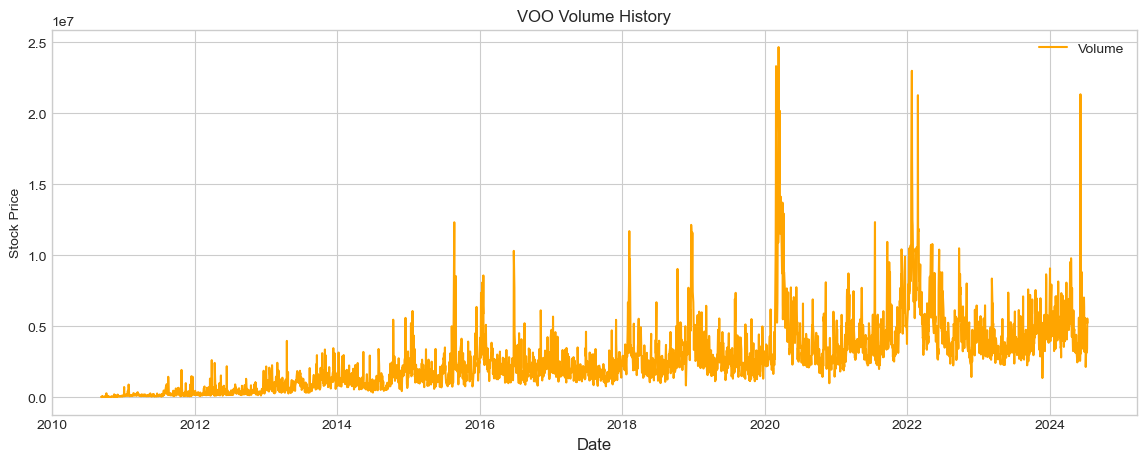

In [11]:
# Plot Volume History
plt.figure(figsize=(14, 5))
plt.plot(df["Date"], df["Volume"], label="Volume", color="orange")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price")
plt.title("VOO Volume History")
plt.legend()

# Show plot
plt.show()

In [12]:
m = Prophet()

# Drop the columns
ph_df = df.drop(['Open', 'High', 'Low','Volume'], axis=1)
ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
3482,2010-09-09,101.320
3481,2010-09-10,101.780
3480,2010-09-13,103.060
3479,2010-09-14,103.038
3478,2010-09-15,103.300


In [13]:
m.fit(ph_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [14]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3843,2025-07-08,458.701682,431.034333,483.929058
3844,2025-07-09,458.562973,431.787903,482.721607
3845,2025-07-10,458.675633,430.530516,485.375186
3846,2025-07-11,458.843946,431.977194,484.925365
3847,2025-07-12,452.425794,425.880634,476.651317


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


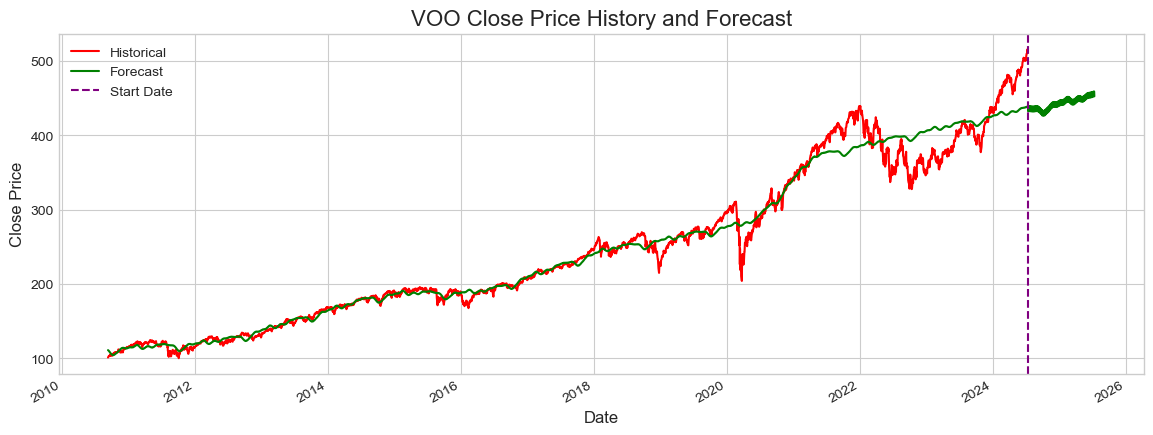

In [15]:
# Prepare data for Prophet
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df = df[['ds', 'y']]

# Fit the Prophet model
m = Prophet()
m.fit(df)

# Make a future dataframe for 365 days (1 year)
future = m.make_future_dataframe(periods=365)

# Predict future values
forecast = m.predict(future)

# Plot historical data and forecast
fig, ax1 = plt.subplots(figsize=(14, 5))

# Plot historical close price
ax1.plot(df['ds'], df['y'], label='Historical', color='red')

# Plot forecast
ax1.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='green')

# Add annotations for specific dates
start_date = '2024-07-12'
ax1.axvline(pd.to_datetime(start_date), color='purple', linestyle='--', label='Start Date')

# Formatting the plot
ax1.set_title("VOO Close Price History and Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)
ax1.legend()

# Rotate date labels
plt.gcf().autofmt_xdate()

# Show plot
plt.show()

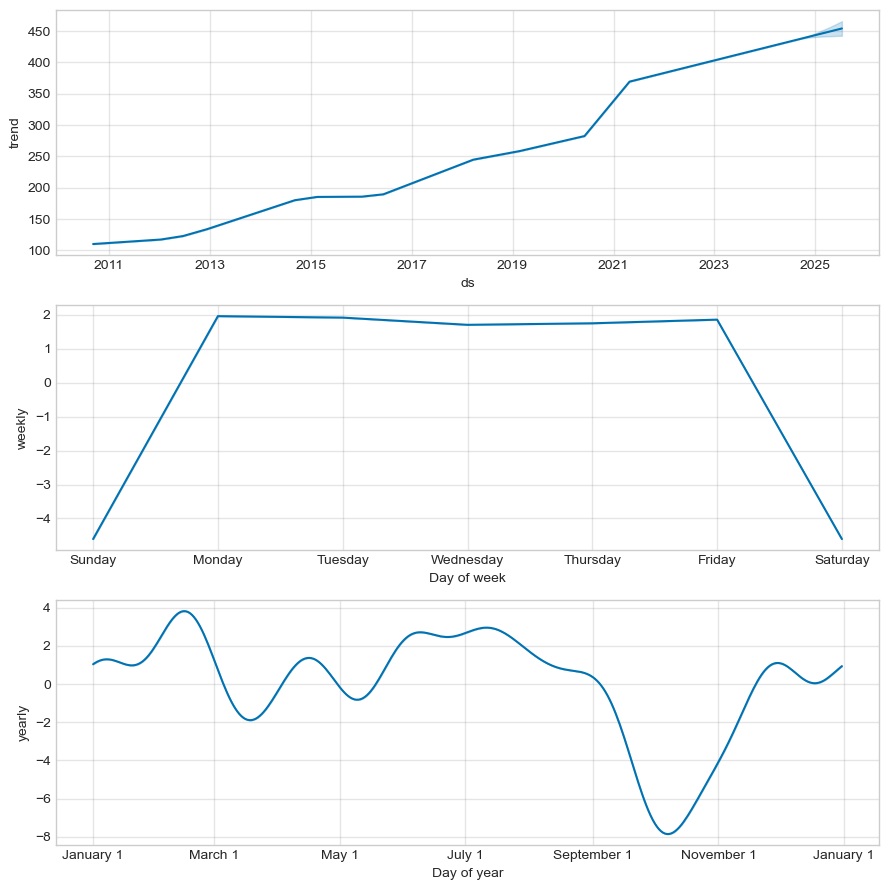

In [16]:
fig2 = m.plot_components(forecast)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


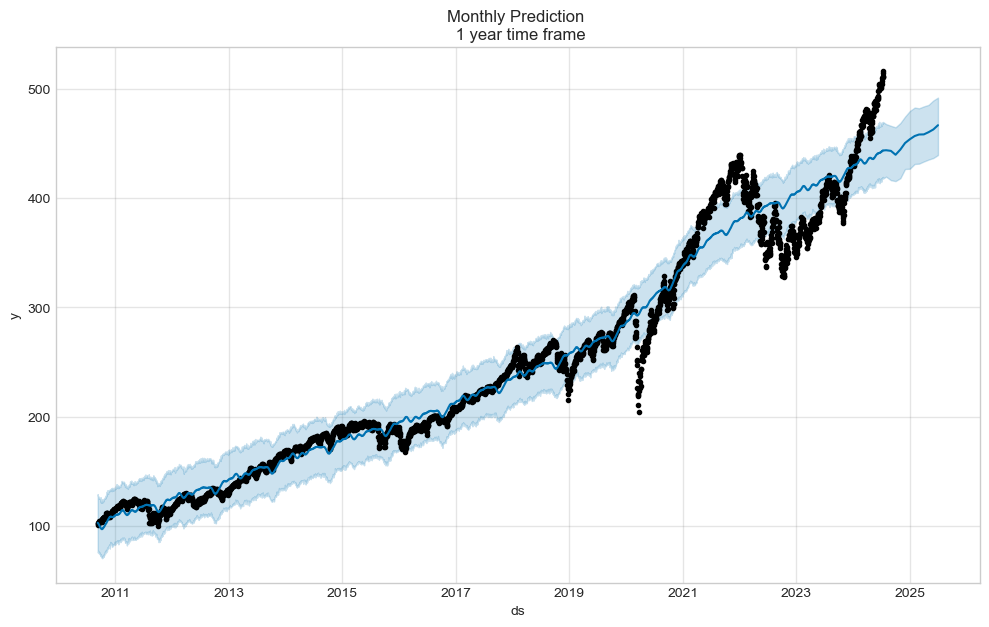

In [17]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

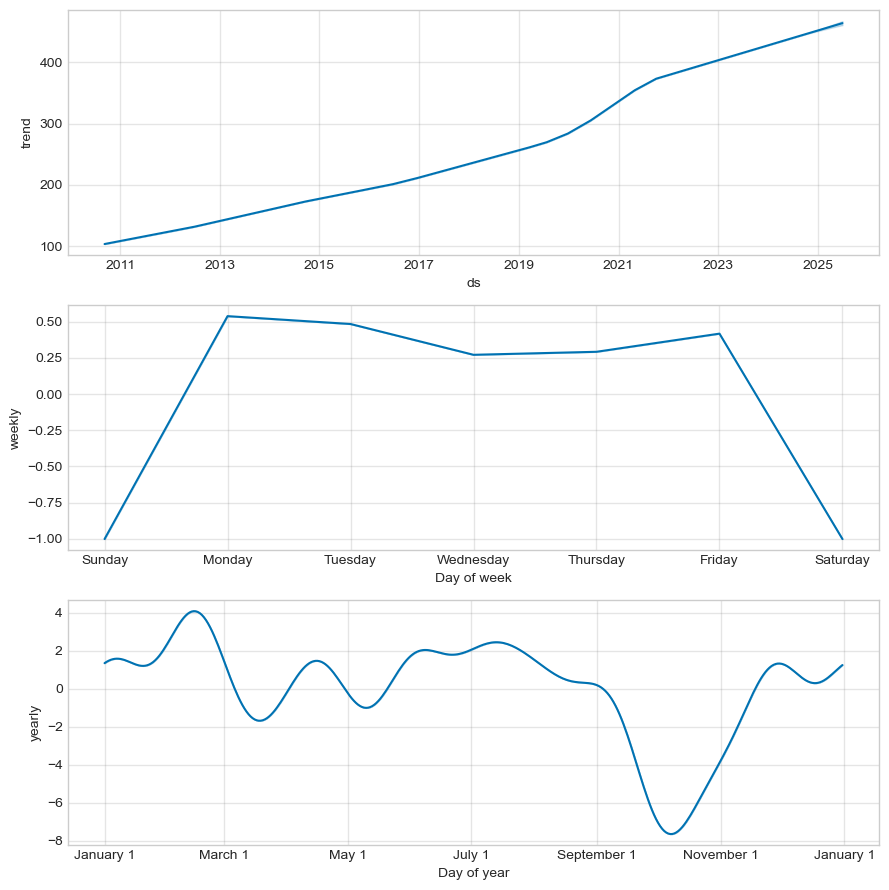

In [18]:
fig = m.plot_components(fcst)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


MAE: 78.46801350447875
MSE: 7946.952484026108
RMSE: 89.14568124158404


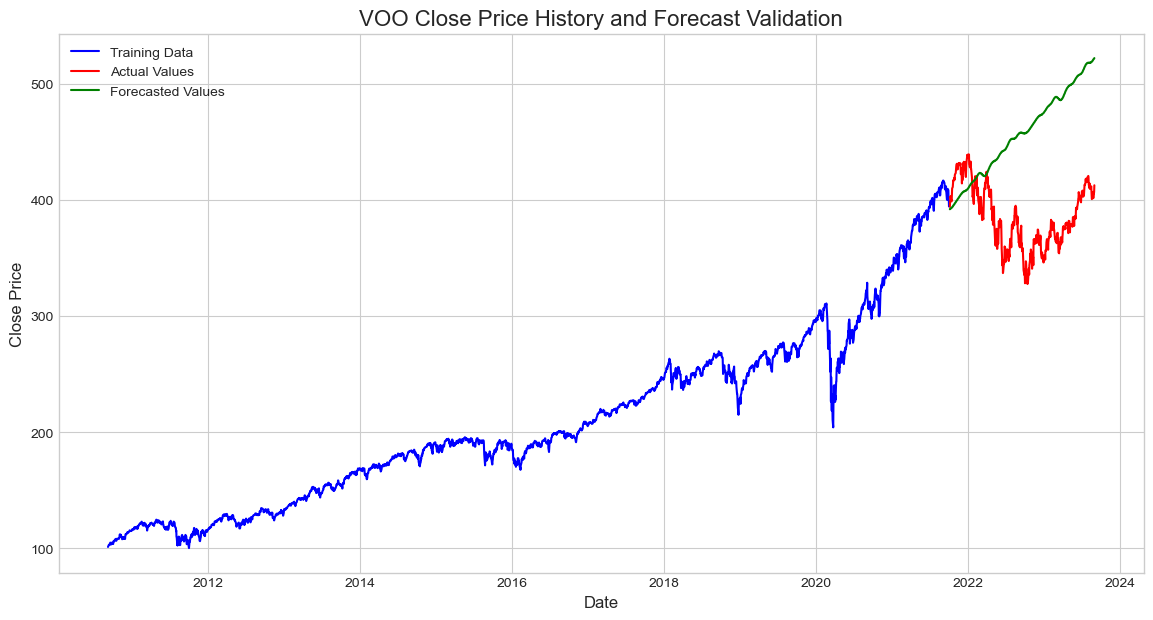

In [19]:
#finding accuracy of forecast 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data into training and validation sets
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
val_df = df[train_size:]

# Fit the Prophet model on the training set
m = Prophet()
m.fit(train_df)

# Make future dataframe for the validation period
future = m.make_future_dataframe(periods=len(val_df), freq='D')
forecast = m.predict(future)

# Extract forecasted values for the validation period
forecast_val = forecast[['ds', 'yhat']].iloc[-len(val_df):]

# Merge actual and forecasted values
val_df = val_df.merge(forecast_val, on='ds')

# Calculate accuracy metrics
mae = mean_absolute_error(val_df['y'], val_df['yhat'])
mse = mean_squared_error(val_df['y'], val_df['yhat'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plot historical data, forecast, and actual values for validation period
plt.figure(figsize=(14, 7))
plt.plot(train_df['ds'], train_df['y'], label='Training Data', color='blue')
plt.plot(val_df['ds'], val_df['y'], label='Actual Values', color='red')
plt.plot(val_df['ds'], val_df['yhat'], label='Forecasted Values', color='green')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.title("VOO Close Price History and Forecast Validation", fontsize=16)
plt.legend()
plt.show()


In [27]:
#read VOO prices
df = pd.read_csv("/Users/yeoyusiang/Downloads/HistoricalPrices.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,07/12/24,512.49,518.030,512.170,514.55,5238170.0
1,07/11/24,516.00,516.790,510.825,511.39,5546308.0
2,07/10/24,511.98,516.185,511.690,515.81,3446923.0
3,07/09/24,511.21,512.010,510.540,510.89,3145823.0
4,07/08/24,510.50,511.205,509.320,510.33,3143379.0


In [28]:
#adding candlesticks

import pandas as pd
import plotly.graph_objects as go

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

#reverse order of DataFrame to get date in ascending order
df = df.iloc[::-1]

# Create OHLC plot
trace = go.Ohlc(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                increasing=dict(line=dict(color='#58FA58')),
                decreasing=dict(line=dict(color='#FA5858')))

layout = go.Layout(title='VOO OHLC Chart',
                   xaxis_title='Date',
                   yaxis_title='Stock Price')

fig = go.Figure(data=[trace], layout=layout)

# Show plot
fig.show()

In [29]:
import pandas as pd
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import iplot

# Calculate Moving Averages (10, 50, and 200)
df['10_d_avg'] = df['Close'].rolling(window=10).mean()
df['50_d_avg'] = df['Close'].rolling(window=50).mean()
df['200_d_avg'] = df['Close'].rolling(window=200).mean()

# Variables to insert into Plotly
ten_d = df['10_d_avg'].tolist()
fifty_d = df['50_d_avg'].tolist()
twoh_d = df['200_d_avg'].tolist()
close_p = df['Close'].tolist()
date = df['Date'].tolist()

# Create subplots
fig = tls.make_subplots(rows=2, cols=1, shared_xaxes=True)

colors = ['#ff4500', '#92a1cf', '#6E6E6E']
avgs = ['10_d_avg', '50_d_avg', '200_d_avg']

# Add moving average traces
for col, c in zip(avgs, colors):
    fig.add_trace(go.Scatter(x=date, y=df[col], mode='lines', name=col, line=dict(color=c)), row=1, col=1)

# Add closing price trace
fig.add_trace(go.Scatter(x=date, y=close_p, mode='lines', name='Closing Price', line=dict(color='#01DF3A')), row=2, col=1)

# Update layout
fig.update_layout(height=800, title='Relationship between MAs and Closing Price',
                  paper_bgcolor='#F2DFCE', plot_bgcolor='#F2DFCE')

# Show plot
iplot(fig, filename='pandas/mixed-type subplots')


In [35]:
import pandas as pd
import numpy as np
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read VOO prices
df = pd.read_csv("/Users/yeoyusiang/Downloads/HistoricalPrices.csv")

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

#reverse order of DataFrame to get date in ascending order
df = df.iloc[::-1]

# Calculate Moving Averages (10, 50, and 200)
df['10_d_avg'] = df['Close'].rolling(window=10).mean()
df['50_d_avg'] = df['Close'].rolling(window=50).mean()
df['200_d_avg'] = df['Close'].rolling(window=200).mean()

# Drop NA values for accurate comparison
df.dropna(inplace=True)

# Calculate accuracy metrics
mae_10 = mean_absolute_error(df['Close'], df['10_d_avg'])
mse_10 = mean_squared_error(df['Close'], df['10_d_avg'])
rmse_10 = np.sqrt(mse_10)

mae_50 = mean_absolute_error(df['Close'], df['50_d_avg'])
mse_50 = mean_squared_error(df['Close'], df['50_d_avg'])
rmse_50 = np.sqrt(mse_50)

mae_200 = mean_absolute_error(df['Close'], df['200_d_avg'])
mse_200 = mean_squared_error(df['Close'], df['200_d_avg'])
rmse_200 = np.sqrt(mse_200)

print(f"10-day MAE: {mae_10}")
print(f"10-day MSE: {mse_10}")
print(f"10-day RMSE: {rmse_10}")

print(f"50-day MAE: {mae_50}")
print(f"50-day MSE: {mse_50}")
print(f"50-day RMSE: {rmse_50}")

print(f"200-day MAE: {mae_200}")
print(f"200-day MSE: {mse_200}")
print(f"200-day RMSE: {rmse_200}")

# Variables to insert into Plotly
date = df['Date'].tolist()

# Create subplots
fig = tls.make_subplots(rows=2, cols=1, shared_xaxes=True)

colors = ['#ff4500', '#92a1cf', '#6E6E6E']
avgs = ['10_d_avg', '50_d_avg', '200_d_avg']

# Add moving average traces
for col, c in zip(avgs, colors):
    fig.add_trace(go.Scatter(x=date, y=df[col], mode='lines', name=col, line=dict(color=c)), row=1, col=1)

# Add closing price trace
fig.add_trace(go.Scatter(x=date, y=df['Close'], mode='lines', name='Closing Price', line=dict(color='#01DF3A')), row=2, col=1)

# Update layout
fig.update_layout(height=800, title='Relationship between MAs and Closing Price',
                  paper_bgcolor='#F2DFCE', plot_bgcolor='#F2DFCE')

# Show plot
iplot(fig, filename='pandas/mixed-type subplots')


10-day MAE: 3.132086425091352
10-day MSE: 21.640578914535634
10-day RMSE: 4.651943563128817
50-day MAE: 7.651417667478684
50-day MSE: 115.40339605996829
50-day RMSE: 10.742597267884907
200-day MAE: 16.616857270706458
200-day MSE: 476.7491160646902
200-day RMSE: 21.83458531927479


In [51]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Read VOO prices
df = pd.read_csv("/Users/yeoyusiang/Downloads/HistoricalPrices.csv")

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

#reverse order of DataFrame to get date in ascending order
df = df.iloc[::-1]

In [81]:
#fit a Prophet model using data from 2009 to 2015 
#make predictions for the monthly returns of 2016.

import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Read VOO prices
df = pd.read_csv("/Users/yeoyusiang/Downloads/HistoricalPrices.csv")

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

#reverse order of DataFrame to get date in ascending order
df = df.iloc[::-1]

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Sort the data by date
data = df.sort_values(by='Date')

# Resample the data to get monthly returns
data.set_index('Date', inplace=True)
monthly_data = data['Close'].resample('M').last()

# Calculate monthly returns
monthly_returns = monthly_data.pct_change().dropna()

# Prepare the data for Prophet model
df = monthly_returns.reset_index()
df.columns = ['ds', 'y']

# Split the data into train and test sets
train = df[df['ds'] <= '2015-12-31']
actual_2016 = df[(df['ds'] >= '2016-01-01') & (df['ds'] <= '2016-12-31')]

# Initialize the model
model = Prophet()

# Fit the model
model.fit(train)

# Make predictions for 2016
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Extract the predictions for 2016
forecast_2016 = forecast[(forecast['ds'] >= '2016-01-01') & (forecast['ds'] <= '2016-12-31')]

# Display the forecast
print(forecast_2016[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


           ds      yhat  yhat_lower  yhat_upper
63 2016-01-31  0.001848   -0.026374    0.028722
64 2016-02-29  0.031191    0.001824    0.059577
65 2016-03-31  0.032455    0.002271    0.061330
66 2016-04-30 -0.007070   -0.035274    0.021731
67 2016-05-31 -0.040848   -0.069705   -0.011260
68 2016-06-30  0.006302   -0.022523    0.034401
69 2016-07-31  0.008743   -0.022047    0.036713
70 2016-08-31  0.004480   -0.024386    0.032634
71 2016-09-30  0.018820   -0.008214    0.050359
72 2016-10-31 -0.027240   -0.055871    0.002334
73 2016-11-30  0.011361   -0.016427    0.040615
74 2016-12-31  0.017599   -0.012036    0.048814


In [82]:
# Merge actual and predicted values for 2016
results = pd.merge(actual_2016, forecast_2016[['ds', 'yhat']], on='ds')

# Calculate MAE and RMSE
# Calculate MAE, RMSE, MSE, and MAPE
mae = mean_absolute_error(results['y'], results['yhat'])
rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))
mse = mean_squared_error(results['y'], results['yhat'])
mape = np.mean(np.abs((results['y'] - results['yhat']) / results['y'])) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Display the results
print(results)

Mean Absolute Error (MAE): 0.02371876151918328
Root Mean Squared Error (RMSE): 0.02932733238413407
Mean Squared Error (MSE): 0.0008600924247694788
Mean Absolute Percentage Error (MAPE): 323.9148184669641
           ds         y      yhat
0  2016-01-31 -0.049109  0.001848
1  2016-02-29 -0.002082  0.031191
2  2016-03-31  0.063029  0.032455
3  2016-04-30  0.003500 -0.007070
4  2016-05-31  0.017546 -0.040848
5  2016-06-30 -0.001766  0.006302
6  2016-07-31  0.036837  0.008743
7  2016-08-31  0.001204  0.004480
8  2016-09-30 -0.004160  0.018820
9  2016-10-31 -0.017917 -0.027240
10 2016-11-30  0.037257  0.011361
11 2016-12-31  0.014377  0.017599


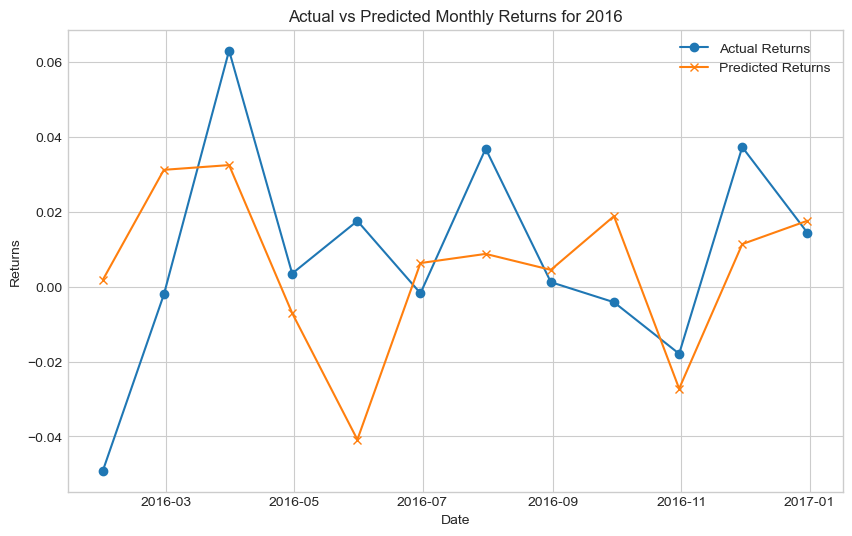

In [83]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(results['ds'], results['y'], label='Actual Returns', marker='o')
plt.plot(results['ds'], results['yhat'], label='Predicted Returns', marker='x')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Actual vs Predicted Monthly Returns for 2016')
plt.legend()
plt.grid(True)
plt.show()

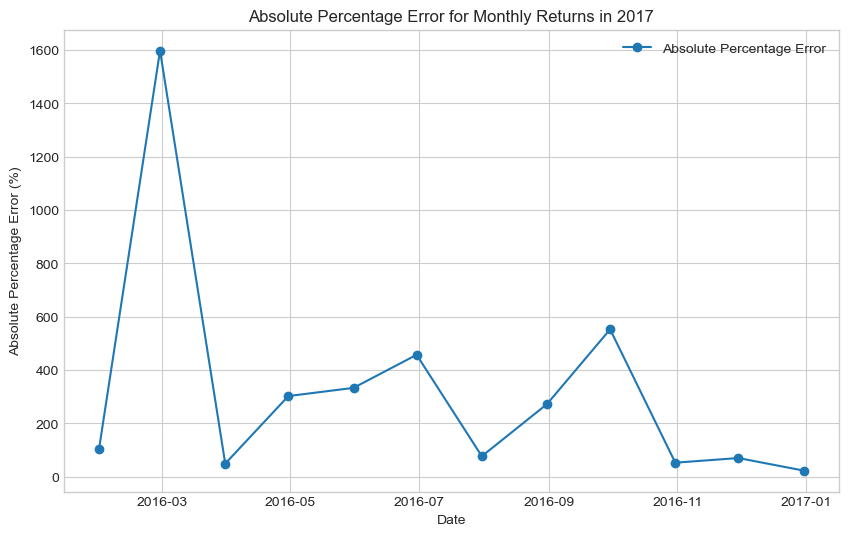

           ds         y      yhat  absolute_percentage_error
0  2016-01-31 -0.049109  0.001848                 103.763363
1  2016-02-29 -0.002082  0.031191                1598.438873
2  2016-03-31  0.063029  0.032455                  48.507316
3  2016-04-30  0.003500 -0.007070                 301.998668
4  2016-05-31  0.017546 -0.040848                 332.810813
5  2016-06-30 -0.001766  0.006302                 456.852190
6  2016-07-31  0.036837  0.008743                  76.265702
7  2016-08-31  0.001204  0.004480                 271.993583
8  2016-09-30 -0.004160  0.018820                 552.402933
9  2016-10-31 -0.017917 -0.027240                  52.029463
10 2016-11-30  0.037257  0.011361                  69.506264
11 2016-12-31  0.014377  0.017599                  22.408654


In [84]:
# Plot absolute percentage errors
results['absolute_percentage_error'] = np.abs((results['y'] - results['yhat']) / results['y']) * 100
plt.figure(figsize=(10, 6))
plt.plot(results['ds'], results['absolute_percentage_error'], label='Absolute Percentage Error', marker='o')
plt.xlabel('Date')
plt.ylabel('Absolute Percentage Error (%)')
plt.title('Absolute Percentage Error for Monthly Returns in 2017')
plt.legend()
plt.grid(True)
plt.show()

# Display results with errors
print(results)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Mean Absolute Error (MAE): 0.011649602077395509
Root Mean Squared Error (RMSE): 0.014139535425912446
Mean Squared Error (MSE): 0.00019992646206063304
Mean Absolute Percentage Error (MAPE): 167.84396870556188


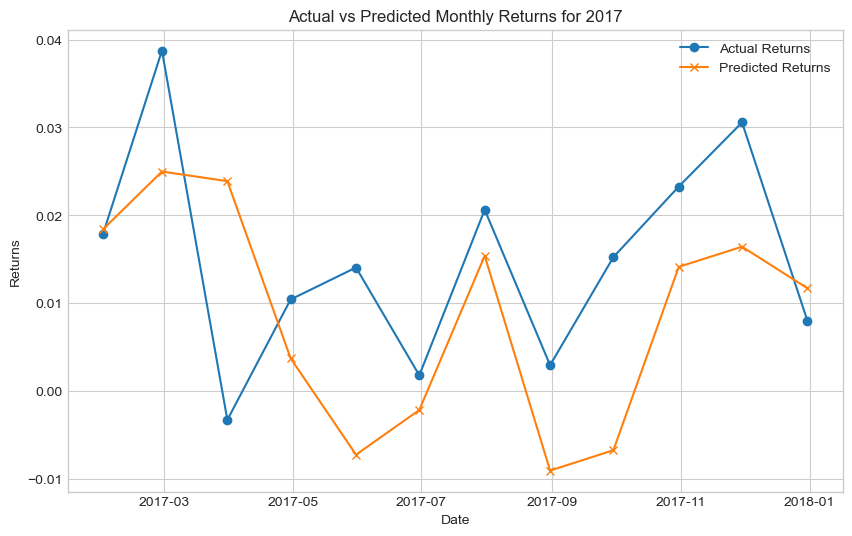

In [79]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Read VOO prices
df = pd.read_csv("/Users/yeoyusiang/Downloads/HistoricalPrices.csv")

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

#reverse order of DataFrame to get date in ascending order
df = df.iloc[::-1]

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Sort the data by date
data = df.sort_values(by='Date')

# Resample the data to get monthly returns
data.set_index('Date', inplace=True)
monthly_data = data['Close'].resample('M').last()

# Calculate monthly returns
monthly_returns = monthly_data.pct_change().dropna()

# Prepare the data for Prophet model
df = monthly_returns.reset_index()
df.columns = ['ds', 'y']

# Split the data into train and test sets
train = df[df['ds'] <= '2016-12-31']
actual_2017 = df[(df['ds'] >= '2017-01-01') & (df['ds'] <= '2017-12-31')]

# Initialize the model
model = Prophet()

# Fit the model
model.fit(train)

# Make predictions for 2017
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Extract the predictions for 2017
forecast_2017 = forecast[(forecast['ds'] >= '2017-01-01') & (forecast['ds'] <= '2017-12-31')]

# Merge actual and predicted values for 2017
results = pd.merge(actual_2017, forecast_2017[['ds', 'yhat']], on='ds')

# Calculate MAE, RMSE, MSE, and MAPE
mae = mean_absolute_error(results['y'], results['yhat'])
rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))
mse = mean_squared_error(results['y'], results['yhat'])
mape = np.mean(np.abs((results['y'] - results['yhat']) / results['y'])) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Plot actual vs predicted values for 2017
plt.figure(figsize=(10, 6))
plt.plot(results['ds'], results['y'], label='Actual Returns', marker='o')
plt.plot(results['ds'], results['yhat'], label='Predicted Returns', marker='x')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Actual vs Predicted Monthly Returns for 2017')
plt.legend()
plt.grid(True)
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Mean Absolute Error (MAE): 8.615536854262333
Root Mean Squared Error (RMSE): 9.610050636522173
Mean Squared Error (MSE): 92.35307323652023
Mean Absolute Percentage Error (MAPE): 4.492794272621812


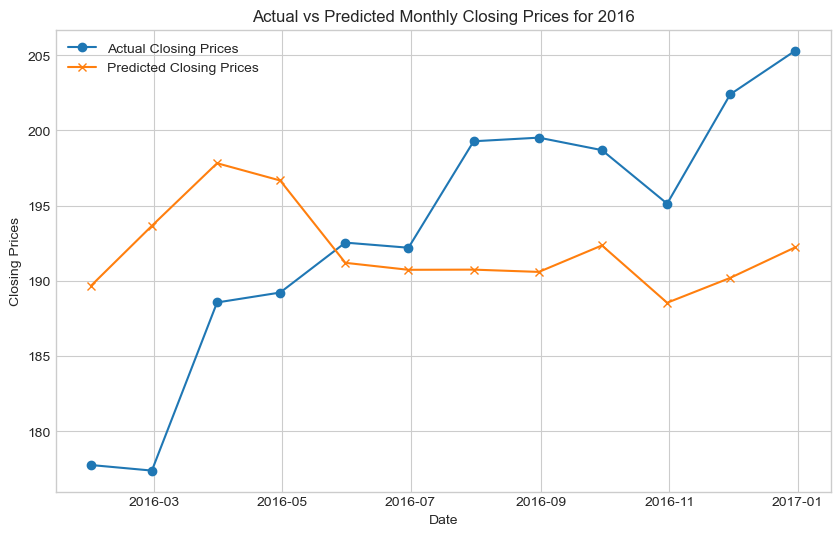

           ds       y        yhat
0  2016-01-31  177.75  189.663288
1  2016-02-29  177.38  193.658224
2  2016-03-31  188.56  197.819268
3  2016-04-30  189.22  196.670824
4  2016-05-31  192.54  191.195995
5  2016-06-30  192.20  190.731853
6  2016-07-31  199.28  190.743614
7  2016-08-31  199.52  190.591312
8  2016-09-30  198.69  192.352222
9  2016-10-31  195.13  188.541458
10 2016-11-30  202.40  190.195086
11 2016-12-31  205.31  192.233622


In [88]:
#predict 2016 based on stock price; 2005-2015

import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Read VOO prices
df = pd.read_csv("/Users/yeoyusiang/Downloads/HistoricalPrices.csv")

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

#reverse order of DataFrame to get date in ascending order
df = df.iloc[::-1]

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Sort the data by date
data = df.sort_values(by='Date')

# Resample the data to get monthly returns
data.set_index('Date', inplace=True)
monthly_data = data['Close'].resample('M').last()

# Prepare the data for Prophet model
df = monthly_data.reset_index()
df.columns = ['ds', 'y']

# Split the data into train and test sets
train = df[df['ds'] <= '2015-12-31']
actual_2016 = df[(df['ds'] >= '2016-01-01') & (df['ds'] <= '2016-12-31')]

# Initialize the model
model = Prophet()

# Fit the model
model.fit(train)

# Make predictions for 2016
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Extract the predictions for 2016
forecast_2016 = forecast[(forecast['ds'] >= '2016-01-01') & (forecast['ds'] <= '2016-12-31')]

# Merge actual and predicted values for 2016
results = pd.merge(actual_2016, forecast_2016[['ds', 'yhat']], on='ds')

# Calculate MAE, RMSE, MSE, and MAPE
mae = mean_absolute_error(results['y'], results['yhat'])
rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))
mse = mean_squared_error(results['y'], results['yhat'])
mape = np.mean(np.abs((results['y'] - results['yhat']) / results['y'])) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Plot actual vs predicted values for 2016
plt.figure(figsize=(10, 6))
plt.plot(results['ds'], results['y'], label='Actual Closing Prices', marker='o')
plt.plot(results['ds'], results['yhat'], label='Predicted Closing Prices', marker='x')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('Actual vs Predicted Monthly Closing Prices for 2016')
plt.legend()
plt.grid(True)
plt.show()

# Display results with errors
print(results)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Mean Absolute Error (MAE): 23.723947475105096
Root Mean Squared Error (RMSE): 25.616407538904213
Mean Squared Error (MSE): 656.2003351992286
Mean Absolute Percentage Error (MAPE): 10.316363254076455


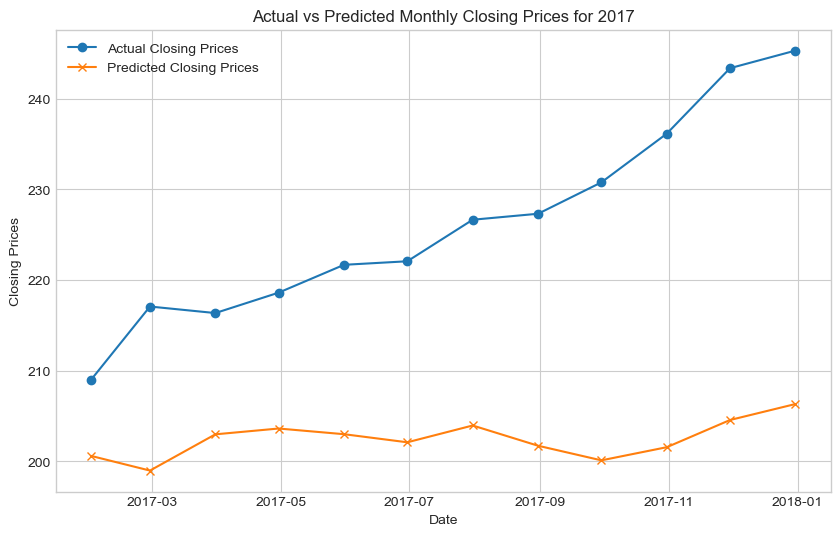

           ds       y        yhat
0  2017-01-31  208.97  200.603913
1  2017-02-28  217.07  198.981978
2  2017-03-31  216.35  202.979440
3  2017-04-30  218.60  203.619627
4  2017-05-31  221.67  202.993644
5  2017-06-30  222.06  202.100930
6  2017-07-31  226.64  203.953473
7  2017-08-31  227.30  201.720018
8  2017-09-30  230.76  200.110482
9  2017-10-31  236.13  201.559668
10 2017-11-30  243.35  204.559206
11 2017-12-31  245.29  206.320250


In [85]:
#predict 2017 based on stock price; 2005-2016

import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Read VOO prices
df = pd.read_csv("/Users/yeoyusiang/Downloads/HistoricalPrices.csv")

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

#reverse order of DataFrame to get date in ascending order
df = df.iloc[::-1]

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Sort the data by date
data = df.sort_values(by='Date')

# Resample the data to get monthly returns
data.set_index('Date', inplace=True)
monthly_data = data['Close'].resample('M').last()

# Prepare the data for Prophet model
df = monthly_data.reset_index()
df.columns = ['ds', 'y']

# Split the data into train and test sets
train = df[df['ds'] <= '2016-12-31']
actual_2017 = df[(df['ds'] >= '2017-01-01') & (df['ds'] <= '2017-12-31')]

# Initialize the model
model = Prophet()

# Fit the model
model.fit(train)

# Make predictions for 2017
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Extract the predictions for 2017
forecast_2017 = forecast[(forecast['ds'] >= '2017-01-01') & (forecast['ds'] <= '2017-12-31')]

# Merge actual and predicted values for 2017
results = pd.merge(actual_2017, forecast_2017[['ds', 'yhat']], on='ds')

# Calculate MAE, RMSE, MSE, and MAPE
mae = mean_absolute_error(results['y'], results['yhat'])
rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))
mse = mean_squared_error(results['y'], results['yhat'])
mape = np.mean(np.abs((results['y'] - results['yhat']) / results['y'])) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Plot actual vs predicted values for 2017
plt.figure(figsize=(10, 6))
plt.plot(results['ds'], results['y'], label='Actual Closing Prices', marker='o')
plt.plot(results['ds'], results['yhat'], label='Predicted Closing Prices', marker='x')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('Actual vs Predicted Monthly Closing Prices for 2017')
plt.legend()
plt.grid(True)
plt.show()

# Display results with errors
print(results)
